## P13 图像基本操作

回顾
- 访问修改像素
- 访问属性
- 设置ROI: Region of Interest 
- 图像分割与合并

(估计就是一些np操作))

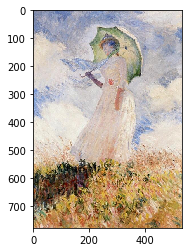

[182 163 160]
182 163 160


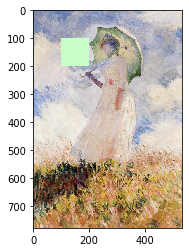

131
100
(778, 533, 3)
1244022
uint8


In [72]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread('./img/LaPromenade.jpg',1)
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

#访问像素
print(img[100,100])
b,g,r = img[100,100]
print(b,g,r)
imageRGB[100:200,100:200] = [200,255,200]
plt.imshow(imageRGB)
plt.show()

print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))

## numpy批量访问速度快 单个访问速度慢

print(img.shape)
print(img.size)
print(img.dtype)

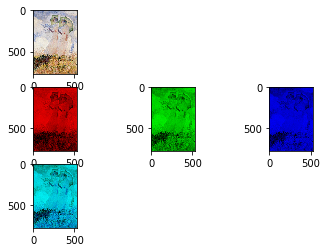

In [73]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

grid = 330

# 剪切复制
img = cv.imread('./img/LaPromenade.jpg',1)
mademoiselle = img[50:600,200:400]
img[70:620,300:500] = mademoiselle
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.subplot(grid+1)
plt.imshow(imageRGB)

# r,g,b = cv.split(img) #很花时间
b=img[:,:,2]
g=img[:,:,1]
r=img[:,:,0]
imageR = np.zeros(img.shape,np.uint8)
imageR[:,:,0] = r
imageG = np.zeros(img.shape,np.uint8)
imageG[:,:,1] = g
imageB = np.zeros(img.shape,np.uint8)
imageB[:,:,2] = b

plt.subplot(grid+4)
plt.imshow(imageR)
plt.subplot(grid+5)
plt.imshow(imageG)
plt.subplot(grid+6)
plt.imshow(imageB)

# 合并通道
imageGB = cv.merge((np.zeros(r.shape,np.uint8),g,b))
plt.subplot(grid+7)
plt.imshow(imageGB)

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x149e84dc190>,
 Text(0.5, 1.0, 'ORIGINAL'))

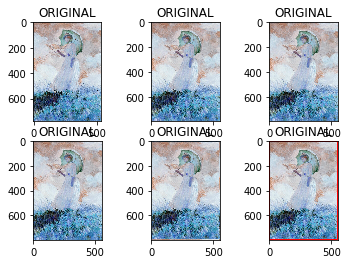

In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

BLUE = [255,0,0]

# 加边框 卷积补零用
img = cv.imread('./img/LaPromenade.jpg',1)
replicate = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT)
reflect_101 = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('ORIGINAL')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('ORIGINAL')
plt.subplot(234),plt.imshow(reflect_101,'gray'),plt.title('ORIGINAL')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('ORIGINAL')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('ORIGINAL')



## P14 图像算数运算

//todo

cv函数 加减位运算   
cv.add()  //形状要相同
cv.addWeighted()  

**numpy数组相加溢出循环 cv相加取最大值**

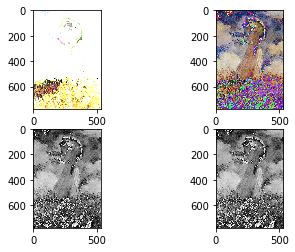

In [86]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread('./img/LaPromenade.jpg',0)#灰图
img2 = cv.imread('./img/LaPromenade.jpg',1)

# img3 = cv.add(img1,img2) #形状不同会报错
img4 = cv.add(img2,img2)
img5 = img2+img2

imageRGB = cv.cvtColor(img4,cv.COLOR_BGR2RGB)
plt.subplot(2,2,1),plt.imshow(imageRGB)
imageRGB = cv.cvtColor(img5,cv.COLOR_BGR2RGB)
plt.subplot(2,2,2),plt.imshow(imageRGB)

img6 = cv.add(img1,img1)
img7 = img1+img1
imageRGB = cv.cvtColor(img7,cv.COLOR_BGR2RGB)# 可以把单色数据变为三色灰度图
plt.subplot(2,2,3),plt.imshow(imageRGB)
imageRGB = cv.cvtColor(img7,cv.COLOR_BGR2RGB)
plt.subplot(2,2,4),plt.imshow(imageRGB)
plt.show()

## P15 图像融合渐变效果

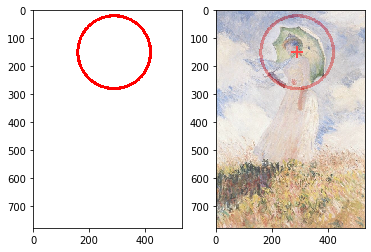

In [94]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread('./img/LaPromenade.jpg',1)
img1 = np.full(img.shape,255,np.uint8)

cv.circle(img1,(290,150),130,(0,0,255),10)
cv.line(img,(310,150),(270,150),(0,0,255),5)
cv.line(img,(290,130),(290,170),(0,0,255),5)

dst = cv.addWeighted(img,0.7,img1,0.3,0)
imageRGB = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
plt.subplot(1,2,1),plt.imshow(imageRGB)
imageRGB = cv.cvtColor(dst,cv.COLOR_BGR2RGB)
plt.subplot(1,2,2),plt.imshow(imageRGB)
plt.show()


## P16-23 按位运算抠图效果

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##  P17 按位运算bitwise_and
##  P18 按位运算bitwise_not
##  P19 按位运算bitwise_or
##  P20 按位运算bitwise_xor

print(bin(0xa5),hex(0b01011010))
band1=np.full((1,1,3),0b11110000,np.uint8)
band2=np.full((1,1,3),0b11001100,np.uint8)
print(
    bin(band1[0,0,0]),
    bin(band2[0,0,0]),
)
print(
    bin(cv.bitwise_and(band1,band2)[0,0,0]),
    bin(cv.bitwise_not(band2)[0,0,0]),
    bin(cv.bitwise_or(band1,band2)[0,0,0]),
    bin(cv.bitwise_xor(band1,band2)[0,0,0]),
    sep = "\n"
)

## P21 阈值函数threshold
# scr:要处理的图片
# thresh: threshold阈值
# maxval:最大值
# type:类型
img1 =np.zeros((10,10),np.uint8)
img1 [ 0:5, 0:51]=[5]
img1 [ 0:5, 5:10]=[50]
img1 [ 5:10, 0:10]=[100]
img1 [ 5:10, 5:10]=[250]
print(img1)
ret, mask = cv.threshold(img1, 20, 200, cv.THRESH_BINARY)
print(ret)
print(mask)


0b10100101 0x5a
0b11110000 0b11001100
0b11000000
0b110011
0b11111100
0b111100
[[  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [  5   5   5   5   5  50  50  50  50  50]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]
 [100 100 100 100 100 250 250 250 250 250]]
20.0
[[  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [  0   0   0   0   0 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]]


img2gray <class 'numpy.ndarray'> uint8 (260, 260)
mask.shape <class 'numpy.ndarray'> uint8 (260, 260)
255
0
mask_inv.shape (260, 260)


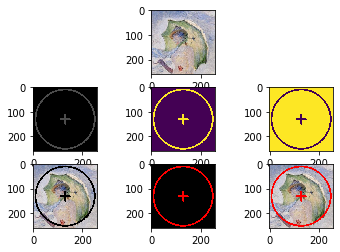

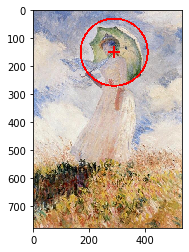

In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def grid(x,y):#plt风格
    h,w=3,3
    return h,w,(x-1)*w+y

## P16/22/23 按位运算抠图效果
img1 = cv.imread('./img/LaPromenade.jpg',1)
img2 = np.zeros((260,260,3),np.uint8)

cv.circle(img2,(130,130),120,(0,0,255),5)
cv.line(img2,(110,130),(150,130),(0,0,255),5)
cv.line(img2,(130,110),(130,150),(0,0,255),5)
imageRGB = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
plt.subplot(2, 3, 1)#(grid(1,1))
plt.imshow(imageRGB)

#img1 处理的区城
roi = img1[(150-130):(150+130),(290-130):(290+130)]
#用matplotlib显示roi
imageRGB = cv.cvtColor(roi,cv.COLOR_BGR2RGB)
plt.subplot(*grid(1,2))
plt.imshow(imageRGB)

#img2灰度图像
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
print('img2gray',type(img2gray),img2gray.dtype,img2gray.shape,)
#显示
imageRGB = cv.cvtColor(img2gray, cv.COLOR_BGR2RGB)#这里被填成RGB了
plt.subplot(*grid(2,1))
plt.imshow (imageRGB)

#大于10的值,都变成255
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
plt.subplot(*grid(2,2))
plt.imshow(mask)
print('mask.shape',type(mask),mask.dtype,mask.shape)
# print(mask[e, 0]) #观察背景色,为黑色print(mask [13 , 13 ]) #观察红色点坐标,现在变为白色

#反色
mask_inv = cv.bitwise_not(mask)
plt.subplot(*grid(2,3))
plt.imshow(mask_inv)
print(mask_inv[0,0]) #观察背景色，为黑色
print (mask_inv[130, 130]) #观察红色点坐标，现在交为白色

#把圈的位置抠出来
#将roi非选中部分and置0 不参加后面的运算
print('mask_inv.shape',mask_inv.shape)
img1_bg = cv.bitwise_and(roi, roi, mask =mask_inv)#形状不一样 所以用mask
imageRGB = cv.cvtColor( img1_bg,cv.COLOR_BGR2RGB)
plt.subplot(*grid(3,1))
plt.imshow(imageRGB)
# print(img1_bg[0,0]) #观察背景
# print( img1_bg[130,130]) # mask的部分，是黑色

# Take only region of logo from logo image.
# 取出log的部分
img2_fg = cv.bitwise_and(img2, img2 , mask = mask)
# img2_fg = cv.bitwise_ and( img2, img2, mask = img2gray)
imageRGB = cv.cvtColor( img2_fg, cv.COLOR_BGR2RGB)
plt.subplot(*grid(3,2))
plt.imshow( imageRGB )
# print(img2_fg[0,0]) #观察竹景
# print( img2_fg[130, 130]) # mask的部分，是黑色

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg, img2_fg)
imageRGB = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
plt.subplot(*grid(3,3))
plt.imshow(imageRGB)

plt.show()

img1[ (150-130):(150+130), (290-130):(290+130)] = dst
imageRGB = cv.cvtColor( img1,cv.COLOR_BGR2RGB )
plt.imshow( imageRGB )
plt.show()


## P26 代码效率的评估和优化


In [ ]:
#导入本安验所需数据集
# import os
# import zipfile
# import requests
# zipName = "opencv_dataset.zip"
# if not os.path.exists(zipName):
#     print('下载数据集，请稍等..')
#     url = 'http://dolphin-public.oss-cn-shanghai.aliyuncs.com/dataset/opencv'
#     r = requests.get(url)
#     with open(zipName, "wb") as code:
#         code.write(r.content)
# if not os.path.exists('. /opencv_ dataset' ):
#     with zipfile.ZipFile('./opencv_ dataset.zip') as z:
#         z.extractal1()


t1 166958832508 1589609287.8835766
t2 166967787244 1589609288.779442
delta 0.8954736 0.8958654403686523


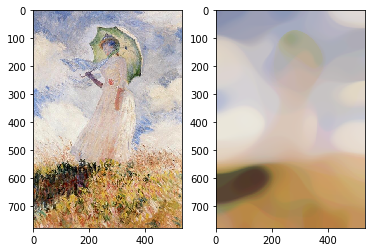

In [93]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time as itmepkg
%matplotlib inline

def grid(x,y):#plt风格
    h,w=1,2
    return h,w,(x-1)*w+y

e1 = cv.getTickCount()
#你要云新的程序
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()

img1 = cv.imread('./img/LaPromenade.jpg',1) #彩色图像

plt.subplot(*grid(1,1))
imageRGB = cv.cvtColor( img1,cv.COLOR_BGR2RGB )
plt.imshow( imageRGB )

e1 = cv. getTickCount()
tm1 = itmepkg.time()
print('t1',e1,tm1)
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i) # median filtering 中值滤波器
e2 = cv.getTickCount()
tm2 = itmepkg.time()
print('t2',e2,tm2)
t =(e2 - e1)/cv.getTickFrequency()
# print(cv.getTickFrequency)
print('delta', t ,tm2-tm1)

imageRGB = cv.cvtColor( img1,cv.COLOR_BGR2RGB )
plt.subplot(*grid(1,2))
plt.imshow( imageRGB )
plt.show()


## P26 cv函数与np函数效率对比

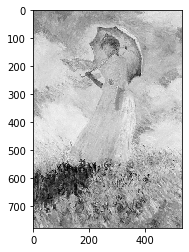

14.8 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
414528
583 µs ± 3.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
414528
21.4 µs ± 63.6 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
236 µs ± 3.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread('./img/LaPromenade.jpg',0) #灰色图像
imageRGB = cv.cvtColor( img1, cv.COLOR_BGR2RGB)
plt.imshow( imageRGB )
plt.show()
%timeit z = cv.countNonZero( img1)#这里要求img1必须是单通道
print(z)
%timeit z = np.count_nonzero( img1)
print(z)

%timeit cv.add(img1,img1)
%timeit img1+img1

# cv函数快25倍
